# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# Representación adecuada de la información
---

## Importar imagen ejemplo:

Para el ploteo de imágenes se utiliza la librería _matplotlib_, específicamente _pyplot_:

In [7]:
from matplotlib import pyplot as plt
#plt.rcParams['image.cmap'] = 'gray'

También se utilizan diferentes funciones pertenecientes a la librería _numpy_ por lo tanto también se la importa:

In [3]:
import numpy as np

Se utilizarán librerías de _OpenCV_ al igual que _SciKit_, en este caso de representación, se utiliza del módulo _cv2_ la función _resize_.

In [12]:
import cv2

_scikit-image_ provee un submodulo para la entrada y salida de imágenes, generalmente en formato PNG o JPEG. A continuación se importa una imágen a modo de ejemplo de una banana.

In [13]:
from skimage import io

In [20]:
file = './imgs/examples/banana_example.jpg'
fixed_size = tuple((400, 300))

banana = io.imread(file)
banana = cv2.resize(banana, fixed_size)

### Características

- _type(banana)_ nos brinda información de la clase de objeto que es banana, y como puede observarse es un array de _numpy_.

In [21]:
print(type(banana))

<class 'numpy.ndarray'>


- _banana.dtype_ nos da información del tipo de dato por el que está formado banana. En este caso son enteros de 8 bits, lo que quiere decir que su valor se encuentra entre 0 y 255 ($2^{8}-1$).

In [22]:
print(banana.dtype)

uint8


- _banana.shape_ nos dice la estructura de banana. En este  caso es una matriz de 3024x4032 pixeles y 3 capas correspondientes a los colores rojo, verde y azul.

In [23]:
print(banana.shape)

(300, 400, 3)


- _banana.min()_ y _banana.max()_ dan el mínimo y el máximo valor en la imagen. En este caso coincide que la imagen abarca desde 0 su mínimo a 255 su máximo, pero los valores podrían haber sido diferentes.

In [24]:
print(banana.min(), banana.max())

0 255


### Imagen

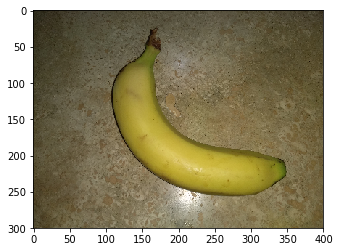

In [25]:
plt.imshow(banana)

## Descomposición de la imagen

Para observar mejor la estructura del objeto que posee la información de la imagen importada, a continuación se descompone la imagen en matrices correspondientes a los colores rojo, verde y azul.
La cuarta imagen corresponde a las tres matrices con diferentes colores superpuestas, que como puede observarse es idéntica a la original.

Text(0.5,1,'todos los canales juntos')

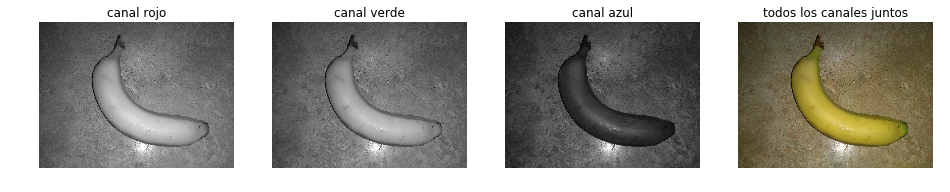

In [10]:
r_banana = banana[:, :, 0]
g_banana = banana[:, :, 1]
b_banana = banana[:, :, 2]

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')
    
(ax_r, ax_g, ax_b, ax_color) = axes

ax_r.imshow(r_banana)
ax_r.set_title('canal rojo')

ax_g.imshow(g_banana)
ax_g.set_title('canal verde')

ax_b.imshow(b_banana)
ax_b.set_title('canal azul')

ax_color.imshow(np.stack([r_banana, g_banana, b_banana], axis=2))
ax_color.set_title('todos los canales juntos')

Si se hace un análisis más profundo de los canales rojo, verde y azul por separado puede observarse que los canales rojo y verde tienen casi la misma "intensidad", mientras que el canal es mucho oscuro. 

Para entender esto, a continuación se expone un ejemplo de circulos rojo, verde y azul superpuestos:

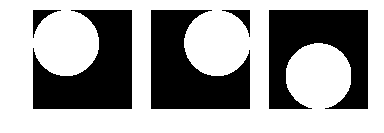

In [11]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
red[r, c] = 1

r, c = draw.circle(100, 200, 100)
green[r, c] = 1

r, c = draw.circle(200, 150, 100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel)
    ax.axis('off')

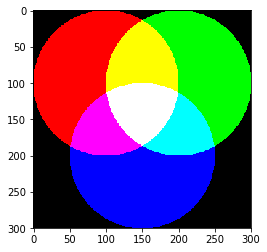

In [12]:
plt.imshow(np.stack([red, green, blue], axis=2))

Y como puede observarse, el color amarillo se forma con altos valores de rojo y verde, y bajos valores de azul. Esto se corresponde con la disociación de colores de la imagen de la banana anterior.

## Conversión a escala de grises

Lo siguiente es poder tener una buena representación de la imagen en escala de grises. Esto se realiza dando diferentes pesos a las capas rojo, verde y azul. 

A continuación se expone esto en forma de una comparativa: la primer imagen muestra la conversión realizada con una función de la librería _skimage_, la segunda se obtiene realizando una ponderación manual de acuerdo a la fórmula indicada, y la tercer imagen se obtiene dando el mismo peso a los tres colores, donde puede observarse que la representación no es correcta, la imagen es más oscura.
Nota: Se utiliza img_as_float, donde los elementos no tienen valores enteros entre 0 y 255, sino valores float entre 0 y 1. Esto para que la ponderación tenga el concepto de porcentaje.

Text(0.5,1,'bad gray')

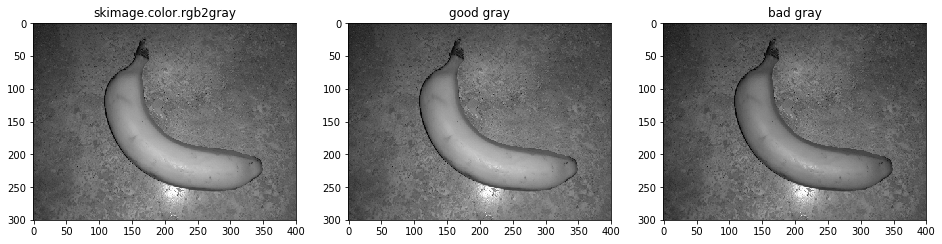

In [27]:
from skimage import color, img_as_float

banana_float = img_as_float(banana)

sk_gray = color.rgb2gray(banana_float)
good_gray = banana_float @ [0.2126, 0.7152, 0.0722]
bad_gray = banana_float @ [1/3, 1/3, 1/3]

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 5))

ax0.imshow(sk_gray)
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(good_gray)
ax1.set_title('good gray')

ax2.imshow(bad_gray)
ax2.set_title('bad gray')

# Resultados
---

Hasta aquí, se obtuvo la imagen original como una arreglo de pixeles normalizada a un tamaño en específico (reducido); y la misma imágen en escala de grises:

Text(0.5,1,'escala de grises')

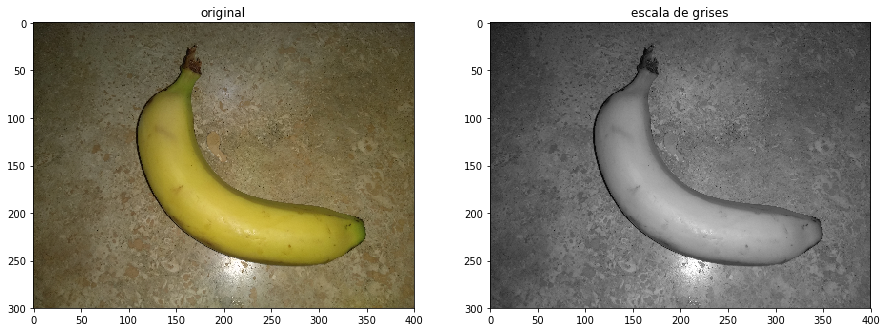

In [28]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(banana)
ax0.set_title('original')
ax1.imshow(good_gray)
ax1.set_title('escala de grises')

In [30]:
def img2grey(image, mode='sk'):
    if (mode=='sk'):
        gray = color.rgb2gray(image)
    elif (mode=='cv'):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

In [31]:
def normSize(image, size=(tuple((400, 300)))):
    cv2.resize(image, size)